# Stochastic Optimization for Spectral Risk Measures

In this demo, we show how to train linear models using spectral/$L$-risk objectives.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from src.utils.data import load_dataset
from src.optim.objective import ORMObjective, get_extremile_weights
from src.optim.algorithms import LSVRG

The fundamental objects needed are an `ORMObjective` (which depends on data, choice of loss, and a spectrum), as well as an `Optimizer`. We construct the former.

In [2]:
# Example: extremile with risk parameters r = 3 and l2 regularization 1/n.
l2_reg = 1.0
X_train, y_train, X_val, y_val = load_dataset("yacht")
train_objective = ORMObjective(
    X_train, 
    y_train, 
    weight_function=lambda n: get_extremile_weights(n, 2.0), 
    loss="squared_error", 
    l2_reg=l2_reg
)
val_objective = ORMObjective(
    X_val, 
    y_val, 
    weight_function=lambda n: get_extremile_weights(n, 2.0), 
    loss="squared_error"
)

We then define the LSVRG optimizer and train a prediction model on these objectives.

In [15]:
n_epochs = 20
lr = 0.001

optimizer = LSVRG(train_objective, lr=lr, epoch_len=None)

train_losses = []
val_losses = []
epoch_len = optimizer.get_epoch_len()
for epoch in range(n_epochs):

    optimizer.start_epoch()
    for _ in range(epoch_len):
        optimizer.step()
    optimizer.end_epoch()

    train_losses.append(train_objective.get_batch_loss(optimizer.weights).item())
    val_losses.append(val_objective.get_batch_loss(optimizer.weights).item())

Plot the train and validation loss of the optimizer.

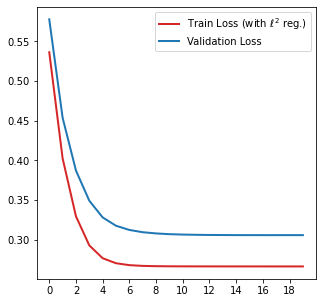

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

x = np.arange(len(train_losses))
ax.plot(x, train_losses, color="tab:red", linewidth=2, label=r"Train Loss (with $\ell^2$ reg.)")
ax.plot(x, val_losses, color="tab:blue", linewidth=2, label = "Validation Loss")
ax.legend()
ax.set_xticks(2 * np.arange(10))
plt.show()